In [15]:
import pandas as pd

# Configure pandas display options to enhance readability of DataFrames.
# Set the maximum number of rows displayed to 50 to prevent truncation of output.
pd.options.display.max_rows = 50

# Set the maximum number of columns displayed to 50 to ensure comprehensive view of DataFrames.
pd.options.display.max_columns = 50

In [16]:
# Load the dataset from 'flights.csv' into a pandas DataFrame.
flights = pd.read_csv("flights.csv")

In [17]:
# Remove the 'Unnamed: 0' column, which is likely an index or unnecessary metadata column.
flights.drop(columns=["Unnamed: 0"], axis=1, inplace=True)

# Display the first few rows of the DataFrame to provide a quick overview of the dataset.
flights.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


Some value counts

In [18]:
flights.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [19]:
flights.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [20]:
flights.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [21]:
flights.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [22]:
flights.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [23]:
flights.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [24]:
flights["class"].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

# Data Pre-Processing

Binary Encoding: class

In [25]:
# Transform the 'class' column in the DataFrame into a binary format.
# Apply a lambda function to encode 'Economy' class as 1 and all other values as 0.
# This transformation facilitates numerical analysis or machine learning tasks that require binary classification.
flights["class"] = flights["class"].apply(lambda x: 1 if x == "Economy" else 0)

In [26]:
flights

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,1,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,1,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,1,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,1,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,0,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,0,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,0,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,0,10.00,49,81585


Factorizing: stops

In [27]:
# Convert the 'stops' column into numerical format using factorization.
flights.stops = pd.factorize(flights.stops)[0]

In [28]:
flights.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,1,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,1,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,1,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,1,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,1,2.33,1,5955


In [29]:
flights.drop(columns=["flight"], axis=1, inplace=True)

In [30]:
flights.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,1,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,1,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,1,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,1,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,1,2.33,1,5955


One-Hot Encoding: airline, source_city, departure_time, arrival_time, destination_city

In [31]:
# Perform one-hot encoding on categorical columns to convert them into numerical format.
# For each categorical column, generate dummy variables (one-hot encoding) and prepend appropriate prefixes to the new columns.
# After encoding, drop the original categorical columns to avoid redundancy in the dataset.

# One-hot encode the 'airline' column and drop the original column.
flights = flights.join(pd.get_dummies(flights["airline"], prefix="Airline")).drop(columns=["airline"], axis=1)

# One-hot encode the 'source_city' column and drop the original column.
flights = flights.join(pd.get_dummies(flights["source_city"], prefix="Source_City")).drop(columns=["source_city"], axis=1)

# One-hot encode the 'departure_time' column and drop the original column.
flights = flights.join(pd.get_dummies(flights["departure_time"], prefix="Departure_At")).drop(columns=["departure_time"], axis=1)

# One-hot encode the 'arrival_time' column and drop the original column.
flights = flights.join(pd.get_dummies(flights["arrival_time"], prefix="Arrival_At")).drop(columns=["arrival_time"], axis=1)

# One-hot encode the 'destination_city' column and drop the original column.
flights = flights.join(pd.get_dummies(flights["destination_city"], prefix="Destination_City")).drop(columns=["destination_city"], axis=1)

In [32]:
# Convert boolean values in the DataFrame to integers.
# Apply a lambda function that maps 'True' to 1 and 'False' to 0, while leaving other values unchanged.
flights = flights.map(lambda x: 1 if x is True else 0 if x is False else x)

In [33]:
flights.head()

,stops,class,duration,days_left,price,Airline_AirAsia,Airline_Air_India,Airline_GO_FIRST,Airline_Indigo,Airline_SpiceJet,Airline_Vistara,Source_City_Bangalore,Source_City_Chennai,Source_City_Delhi,Source_City_Hyderabad,Source_City_Kolkata,Source_City_Mumbai,Departure_At_Afternoon,Departure_At_Early_Morning,Departure_At_Evening,Departure_At_Late_Night,Departure_At_Morning,Departure_At_Night,Arrival_At_Afternoon,Arrival_At_Early_Morning,Arrival_At_Evening,Arrival_At_Late_Night,Arrival_At_Morning,Arrival_At_Night,Destination_City_Bangalore,Destination_City_Chennai,Destination_City_Delhi,Destination_City_Hyderabad,Destination_City_Kolkata,Destination_City_Mumbai
0,0,1,2.17,1,5953,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,1,2.33,1,5953,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0,1,2.17,1,5956,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0,1,2.25,1,5955,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
4,0,1,2.33,1,5955,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1


## Model Training

In [34]:
# Import necessary modules for machine learning.
# RandomForestRegressor: A model from the ensemble methods in scikit-learn for performing regression tasks.
# train_test_split: A utility function from scikit-learn for splitting data into training and testing sets.
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [35]:
# Separate the dataset into features and target variable.
X, y = flights.drop(columns=["price"], axis=1), flights.price

In [36]:
# Split data into training and testing sets with 20% of the data reserved for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [37]:
# Initialize a RandomForestRegressor with parallel processing enabled (n_jobs=-1).
reg: RandomForestRegressor = RandomForestRegressor(n_jobs=-1)

In [38]:
# Train the RandomForestRegressor model using the training data.
reg.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [39]:
# Evaluate the model's performance on the testing data and return the R^2 score.
reg.score(X_test, y_test)

0.9851753048306108

In [40]:
# Import metrics for model evaluation and mathematical functions.
# mean_absolute_error, mean_squared_error, r2_score: Metrics to assess model performance.
# sqrt: Function to compute the square root for calculating Root Mean Squared Error (RMSE).
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

In [41]:
# Predict target values for the test set using the trained model.
y_predict = reg.predict(X_test)

# Output the evaluation metrics for the model:
# R2 score: Measures the proportion of variance explained by the model.
# Mean Absolute Error (MAE): Average absolute error between predicted and actual values.
# Mean Squared Error (MSE): Average squared error between predicted and actual values.
# Root Mean Squared Error (RMSE): Square root of the MSE, representing the standard deviation of prediction errors.
print(f"R2 score: {r2_score(y_test, y_predict)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_predict)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_predict)}")
print(f"Root Mean Squared Error: {sqrt(mean_squared_error(y_test, y_predict))}")

R2 score: 0.9851753048306108
Mean Absolute Error: 1082.044770701738
Mean Squared Error: 7676585.120115212
Root Mean Squared Error: 2770.665104287274


In [42]:
# Import matplotlib.pyplot for creating visualizations and plots.
import matplotlib.pyplot as plt

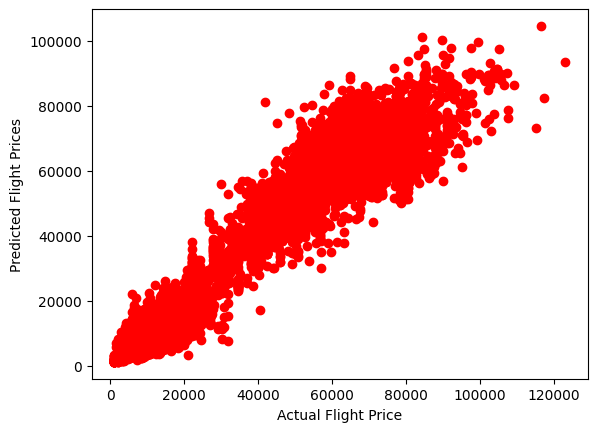

In [43]:
# Create a scatter plot to visualize the relationship between actual and predicted flight prices.
# Actual prices are plotted on the x-axis, predicted prices on the y-axis, with points colored red.
plt.scatter(y_test, y_predict, c="red")
plt.xlabel("Actual Flight Price")
plt.ylabel("Predicted Flight Prices")
plt.show()

Most Important Features (Sorted)


In [44]:
# Compute and sort feature importances from the trained RandomForestRegressor.
# Create a dictionary where feature names are mapped to their importance scores.
# Sort features by importance in descending order.
importances = dict(
    sorted(
        zip(reg.feature_names_in_, reg.feature_importances_),
        key=lambda x: x[1],
        reverse=True
    )
)

In [45]:
# Print the top 5 most important features with their importance scores.
top_5_importances = dict(sorted(importances.items(), key=lambda x: x[1], reverse=True)[:5])

print("Top 5 Most Important Features:")
for feature, importance in top_5_importances.items():
    print(f"{feature}: {importance:.7f}")

Top 5 Most Important Features:
class: 0.8798325
duration: 0.0578379
days_left: 0.0183742
Airline_Air_India: 0.0054240
Airline_Vistara: 0.0045469


In [46]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(reg, file)
print("Model saved successfully with pickle.")

MemoryError: 